## MOHAMMED WASIM ANSARI · 3MO AGO · 188 VIEWS

In [2]:
#importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
df = pd.read_csv("Walmart Data Analysis and Forcasting.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### 1) data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#converting the Date collumn to date-time form
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [12]:
#checking the null values
print(f"the count of null values is {df.isnull().sum()}")

the count of null values is Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [13]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [16]:
#getting the range of time 
time_range = max(df["Date"]) - min(df["Date"])
print(f"the time range valaue is:: {time_range}")

the time range valaue is:: 994 days 00:00:00


### calcualting the KPI (key performing index)

##### 1) total sales per store

In [21]:
total_sale_per_store = df.groupby("Store")["Weekly_Sales"].sum().reset_index()
total_sale_per_store.columns=['Store', 'Total_Sales']

In [22]:
total_sale_per_store.head()

,Store,Total_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)
total_sale_per_store.head()

,Store,Total_Sales
0,1,222402808.85
1,2,275382440.98
2,3,57586735.07
3,4,299543953.38
4,5,45475688.90


#### 2) average weekly sales per store

In [25]:
avg_weekly_sales_per_store = df.groupby("Store")["Weekly_Sales"].mean().reset_index()
avg_weekly_sales_per_store.columns = ["Store", "Average_weekly_sales"]

In [26]:
avg_weekly_sales_per_store.head()

,Store,Average_weekly_sales
0,1,1555264.40
1,2,1925751.34
2,3,402704.44
3,4,2094712.96
4,5,318011.81


#### 3) sales variation per store

In [28]:
sales_variablity_per_store = df.groupby("Store")["Weekly_Sales"].std().reset_index()
sales_variablity_per_store.columns = ["Store", "Sales_Variablity"]

In [29]:
sales_variablity_per_store.head()

,Store,Sales_Variablity
0,1,155980.77
1,2,237683.69
2,3,46319.63
3,4,266201.44
4,5,37737.97


#### 4) sales per store during holidays

In [32]:
avg_sales_per_store_in_holidays = df[df['Holiday_Flag'] == 1].groupby("Store")["Weekly_Sales"].mean().reset_index()
avg_sales_per_store_in_holidays.columns = ["Store", "Avg_Sales_in_Holidays"]

avg_sales_per_store_no_holidays = df[df['Holiday_Flag'] == 0].groupby("Store")["Weekly_Sales"].mean().reset_index()
avg_sales_per_store_no_holidays.columns = ["Store", "Avg_Sales_no_Holidays"]

In [33]:
avg_sales_per_store_in_holidays.head()

,Store,Avg_Sales_in_Holidays
0,1,1665747.66
1,2,2079266.90
2,3,437811.05
3,4,2243102.62
4,5,359501.61


In [35]:
avg_sales_per_store_in_holidays.head()

,Store,Avg_Sales_in_Holidays
0,1,1665747.66
1,2,2079266.90
2,3,437811.05
3,4,2243102.62
4,5,359501.61


## 3) data visulaization

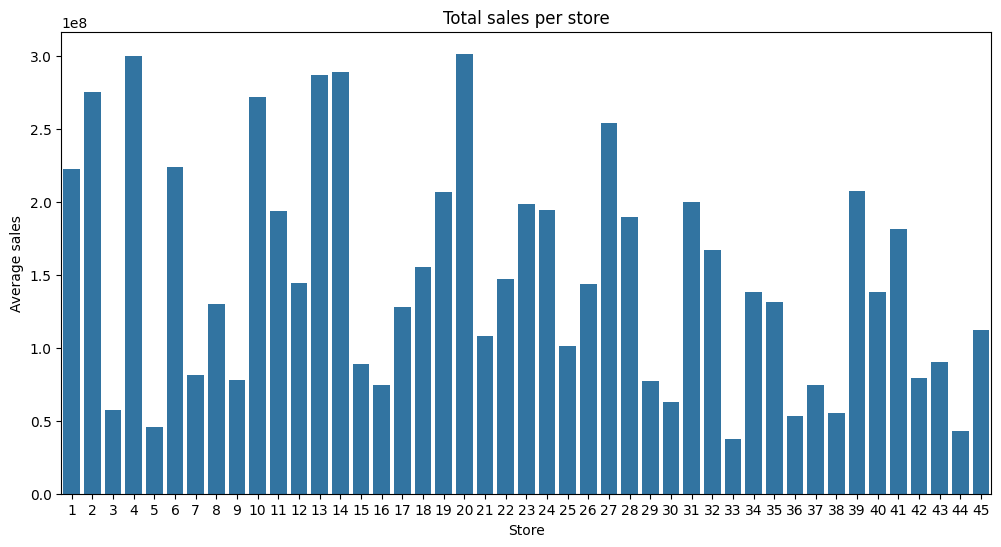

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x="Store", y="Total_Sales", data=total_sale_per_store)
plt.xlabel("Store")
plt.ylabel("Average sales")
plt.title("Total sales per store")
plt.show()

In [40]:
total_sale_per_store.nunique()

Store          45
Total_Sales    45
dtype: int64

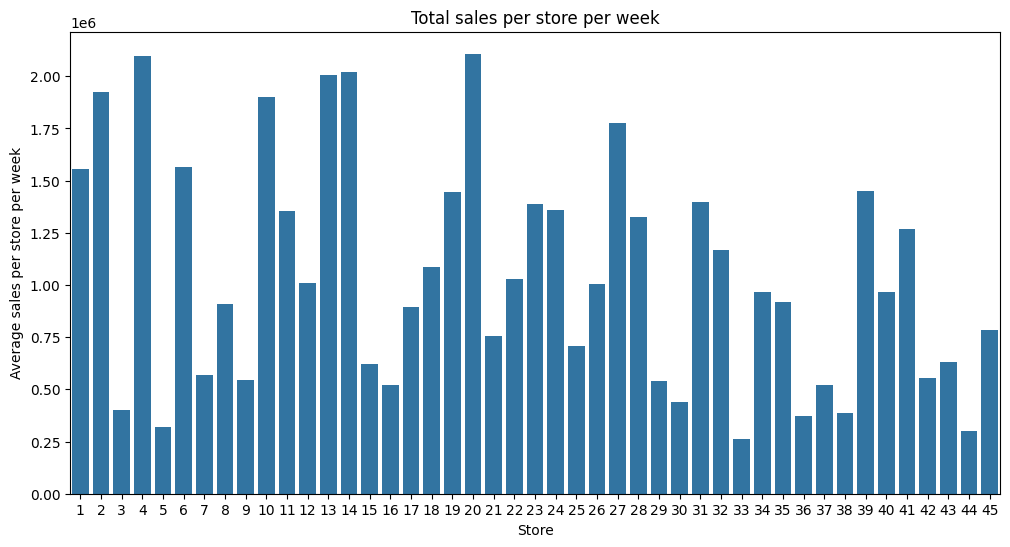

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x="Store", y="Average_weekly_sales", data = avg_weekly_sales_per_store)
plt.xlabel("Store")
plt.ylabel("Average sales per store per week")
plt.title("Total sales per store per week")
plt.show()

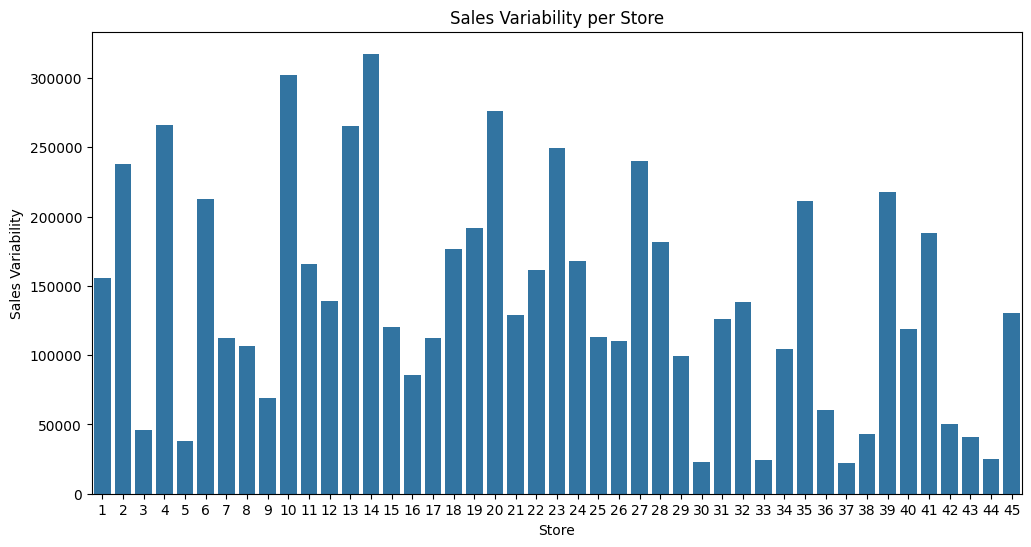

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales_Variablity', data=sales_variablity_per_store)
plt.xlabel('Store')
plt.ylabel('Sales Variability')
plt.title('Sales Variability per Store')
plt.show()

<Figure size 1200x600 with 0 Axes>

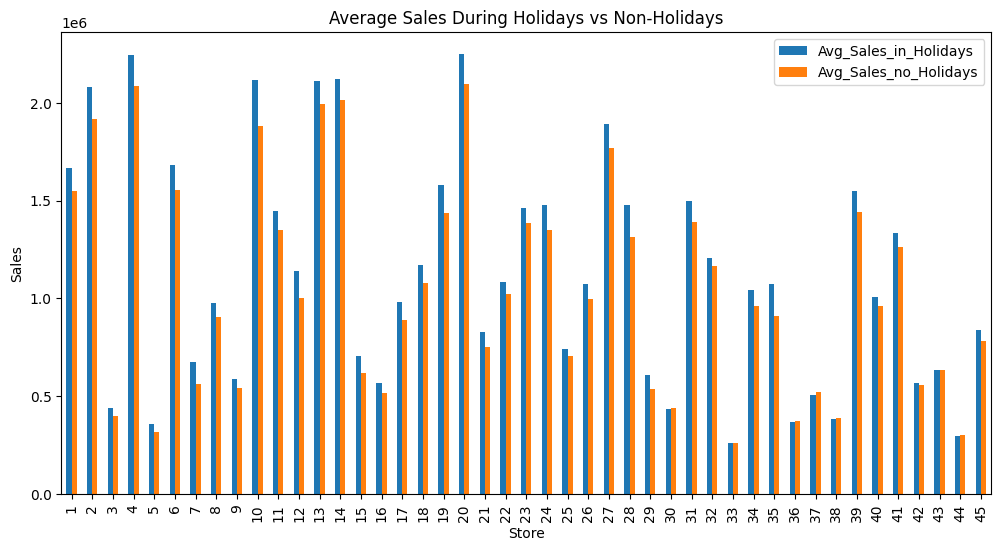

In [45]:
# Merge holiday and non-holiday sales data
holiday_sales = pd.merge(avg_sales_per_store_in_holidays, avg_sales_per_store_no_holidays, on='Store')

plt.figure(figsize=(12, 6))
holiday_sales.set_index('Store').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Average Sales During Holidays vs Non-Holidays')
plt.show()

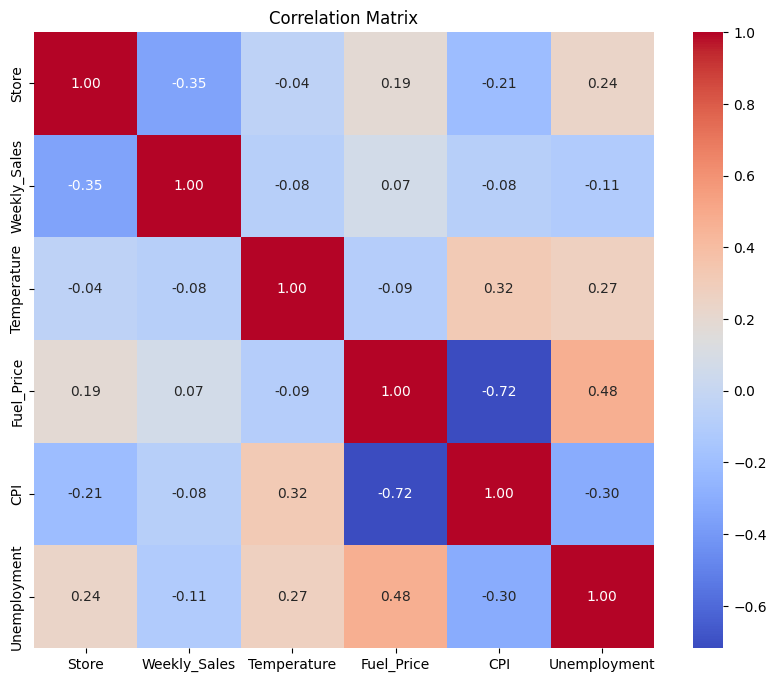

In [46]:
# Calculate correlations between sales and other variables
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

correlations = store_performance.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [49]:

from statsmodels.formula.api import ols

# Fit a linear regression model to assess factors affecting sales
model = ols('Weekly_Sales ~ Temperature + Fuel_Price + CPI + Unemployment', data=store_performance).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.3353
Date:                Sun, 03 Nov 2024   Prob (F-statistic):              0.853
Time:                        21:41:34   Log-Likelihood:                -657.12
No. Observations:                  45   AIC:                             1324.
Df Residuals:                      40   BIC:                             1333.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.633e+04   3.24e+06      0.020   